In [5]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\pratham\\linear regression'

In [8]:
#df = pd.read_csv('C://Users//saish//Desktop//MEDIUM//lr//data.csv', index_col=False)
df = pd.read_csv('C://Users//pratham//linear regression//auto_insurance_sweden.csv')

In [9]:
print(df.head())
# y=f(x1,x2,x3 ) # multiple linear regression R4
#y=f(x1) simple linear regreesion R2

    tv  sales
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


In [10]:
df.info()
#df.ndim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tv      63 non-null     int64  
 1   sales   63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


# Data Visualization

To visualize distribution of data

Regression line is drawn over the points 

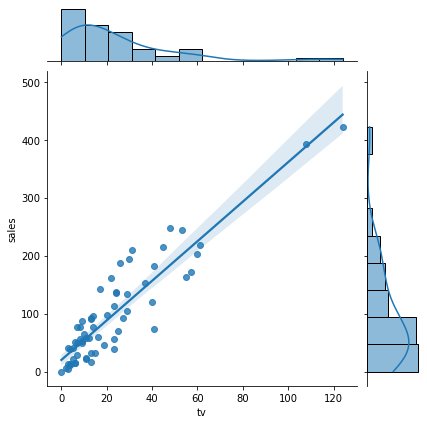

In [15]:
sns.jointplot(x=df['tv'], y=df['sales'], data=df, kind='reg')

In [16]:
df.head()

,tv,sales
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [17]:
X= df[['tv']]
#X= df[['TV']]
#X= df[['TV','Radio']]
Y=df[['sales']]

In [18]:
#y=mx+c
Y.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   63 non-null     float64
dtypes: float64(1)
memory usage: 632.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tv      63 non-null     int64  
 1   sales   63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
x_train

,tv
13,23
34,22
49,3
3,124
17,6
48,8
8,45
6,23
33,5
4,40


In [21]:
y_train


,sales
13,39.6
34,161.5
49,39.9
3,422.2
17,50.9
48,76.1
8,214.0
6,56.9
33,40.3
4,119.4


In [22]:
x_test

,tv
61,53
57,24
0,108
43,37
5,57
36,61
16,24
12,11
25,7
60,14


In [23]:
y_test

,sales
61,244.6
57,137.9
0,392.5
43,152.8
5,170.9
36,217.6
16,134.9
12,23.5
25,77.5
60,95.5


In [24]:
x_train.ndim

2

In [25]:
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (50, 1)
Test - Predictors shape (13, 1)
Train - Target shape (50, 1)
Test - Target shape (13, 1)


# Linear Regression using Scikit


This is the linear regression model implemented using scikit library. 

In [26]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression()

In [27]:
prediction = cls.predict(x_test)

In [28]:
#Parameters used for the model 
cls.get_params()


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [29]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[3.42923429]]


In [30]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [16.7502376]


In [31]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 875.0434234424163


In [32]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.8950819493918402


In [33]:
r2 = metrics.r2_score(y_test, prediction)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2 = 1 -((1-(r2)**2)*(n-1)/(n-p-1))
print(adjusted_r2)

0.7970294397964113


Text(0.5, 1.0, 'Linear Regression')

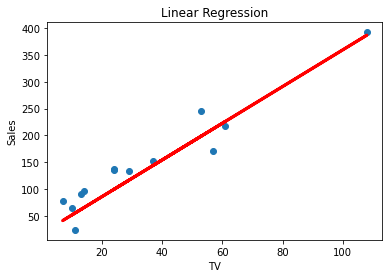

In [34]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression')

In [35]:
len(x_test)

13

Text(0, 0.5, 'Residual')

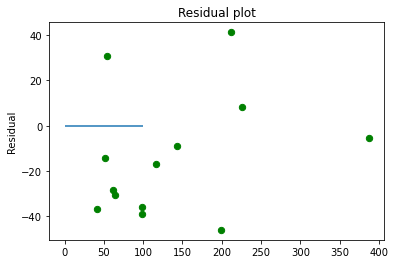

In [36]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

points are scattered around the line zero and there is no pattern that can be observed. This indicates that there no relation between predictors or time dependant data that is missed.